<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/compression/quantizaiton_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np

# матрица float64
matrix_float64 = np.array([[1.23456789, 2.34567891], [3.45678912, 4.56789123]], dtype=np.float64)

# квантизация до float32
matrix_float32 = matrix_float64.astype(np.float32)

# квантизация до float16
matrix_float16 = matrix_float64.astype(np.float16)

print("Original matrix (float64):")
print(matrix_float64)
print("Quantized matrix (float32):")
print(matrix_float32)
print("Quantized matrix (float16):")
print(matrix_float16)

Original matrix (float64):
[[1.23456789 2.34567891]
 [3.45678912 4.56789123]]
Quantized matrix (float32):
[[1.2345679 2.3456788]
 [3.456789  4.567891 ]]
Quantized matrix (float16):
[[1.234 2.346]
 [3.457 4.566]]


Для преобразования к целочисленному виду, значения нужно поместить в диапазон от -128 до 127

In [15]:
# диапазон исходных матриц
min_val = matrix_float64.min()
max_val = matrix_float64.max()

# масштабирование матриц до нужного диапазона:
# 1. простая регуляризация по длине: вычитаем минимальные значения,
# делим на диапазон значений и получаем значения от 0 до 1
normalized_matrix = (matrix_float64 - min_val) / (max_val - min_val)
print("Normalized matrix:\n", normalized_matrix)

# 2. масштабирование до размера диапазона
scaled_to_255 = normalized_matrix * 255
print("\nScaled to 255 matrix:\n", scaled_to_255)

# 3. сдвиг на 128, чтобы попасть в диапазон от -128 до 127
scaled_matrix = scaled_to_255 - 128
print("\nScaled matrix:\n", scaled_matrix)

# квантизация до int8
matrix_int8 = scaled_matrix.astype(np.int8)

print("\nQuantized matrix (int8):")
print(matrix_int8)

Normalized matrix:
 [[0.         0.33333431]
 [0.66666837 1.        ]]

Scaled to 255 matrix:
 [[  0.          85.00024786]
 [170.00043376 255.        ]]

Scaled matrix:
 [[-128.          -42.99975214]
 [  42.00043376  127.        ]]

Quantized matrix (int8):
[[-128  -42]
 [  42  127]]


Проделаем то же с тензорами

In [16]:
import torch

tensor_float32 = torch.tensor([[1.23456789, 2.34567891], [3.45678912, 4.56789123]], dtype=torch.float32)

tensor_float16 = tensor_float32.to(torch.float16)

print("Original tensor (float32):")
print(tensor_float32)
print("Quantized tensor (float16):")
print(tensor_float16)

Original tensor (float32):
tensor([[1.2346, 2.3457],
        [3.4568, 4.5679]])
Quantized tensor (float16):
tensor([[1.2344, 2.3457],
        [3.4570, 4.5664]], dtype=torch.float16)


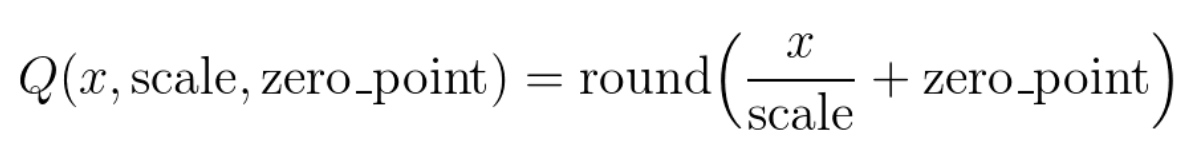

In [28]:
scale = 1 # масштабирование
zero_point = 0 # сдвиг, нужен, если в исходных тензорах есть отрицательные значения

tensor_int8 = torch.quantize_per_tensor(tensor_float32, scale, zero_point, torch.qint8)

print("Quantized tensor (int8):")
print(tensor_int8)

Quantized tensor (int8):
tensor([[1., 2.],
        [3., 5.]], size=(2, 2), dtype=torch.qint8,
       quantization_scheme=torch.per_tensor_affine, scale=1.0, zero_point=0)


```
quantizedValue = round(realValue    / scale       + quantizedZeroPoint)
##               round(39.215686275 / 7.843137255 + 128               ) = 133
##               round(0            / 7.843137255 + 128               ) = 128
##               round(1000         / 7.843137255 + 128               ) = 255
##               round(-1000        / 7.843137255 + 128               ) = 1
```